This script implements the example problem given in the text book, under the section 5.1.2. The example details the phase response of a LTI system and its group delay. In this script, we will simulate an input signal which consists of three sinusoidal components with different frequencies. The signal then, is applied to the LTI system with the function **SystemFunction**. This system is provided for you as a **user defined python function**, thus, you need to import it accordingly. 

For the moment, the contents of the *SystemFunction* is not important for you and we do not want you to understand it. You can think of it as a black-box system.

In [25]:
# As usual, we begin with importing necessary libraries and functions
import numpy as np              # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary

# the main package for signal processing is called "scipy" and we will use "signal" sub-package
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
# alternative syntax: from scipy import signal as sgnl
%matplotlib notebook

# WE NEED TO IMPORT THE CUSTOM (USER DEFINED) FUNCTION AS WELL, IN ORDER TO USE IT!!!
import SystemFunction

<IPython.core.display.Javascript object>


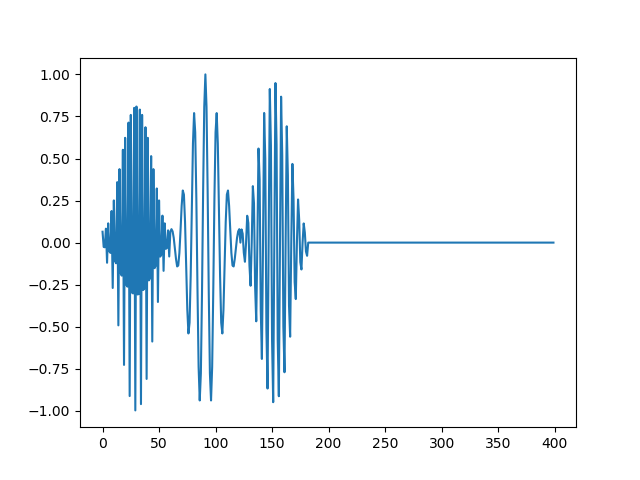

In [26]:
# Generate the individual components and the input signal
N = 400      # total number of samples in the input signal
M = 60       # size of the window function (and sample length of the frequency components)
n = np.arange(0, M+1, 1)   # index vector of M+1 points
wn = 0.54 - 0.46*np.cos(2*np.pi*n/M)      # window function (Hamming window)

# the components
x1 = wn*np.cos(0.2*np.pi*n)               # component with w1 = 0.2*pi frequency
x2 = wn*np.cos(0.4*np.pi*n - np.pi/2)     # component with w1 = 0.4*pi frequency
x3 = wn*np.cos(0.8*np.pi*n - np.pi/5)     # component with w1 = 0.8*pi frequency

xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis=None)

plt.figure()
plt.plot(xn)

We created a signal with three frequency components. We need to calculate the frequency response of the signal, because we will apply it to the system in the frequency domain. Since our system will be defined in the interval of $[-\pi, \pi]$ rad/samples, the Fourier transform of the signal must be in that interval, too.

Note that, *fft* calculates the Fourier transform in $[0 2\pi]$. Thus we need to **shift** it to the correct interval by the following code:

In [27]:
# Calculate the Fourier transform of xn
w = np.linspace(-np.pi, np.pi, N)
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

The system is defined by the **SystemFunction** and its magnitude and phase plots are shown in the following figure:

<IPython.core.display.Javascript object>


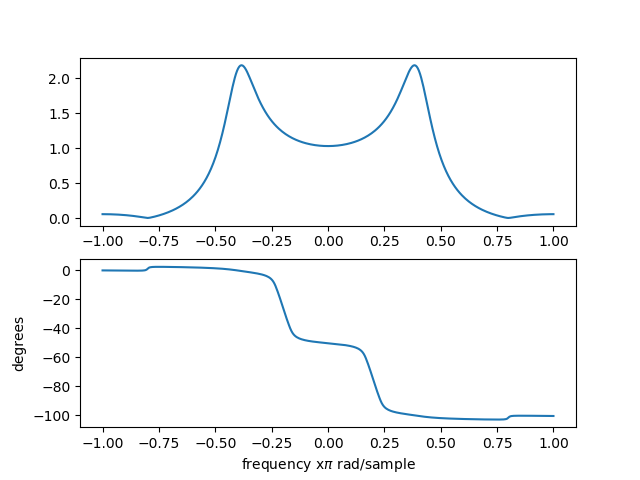

Text(0.5, 0, 'frequency x$\\pi$ rad/sample')

In [37]:
Hw, polezz, zerozz, K = SystemFunction.SystemFunction(w)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

By using the phase response, we calculate its group delay as follows.

**Note** the term $\frac{N}{2\pi}$ is necessary, when we calculate the group delay manually, to obtain correct unit of measurements. Otherwise, it is impossible to interpret the result.

<IPython.core.display.Javascript object>


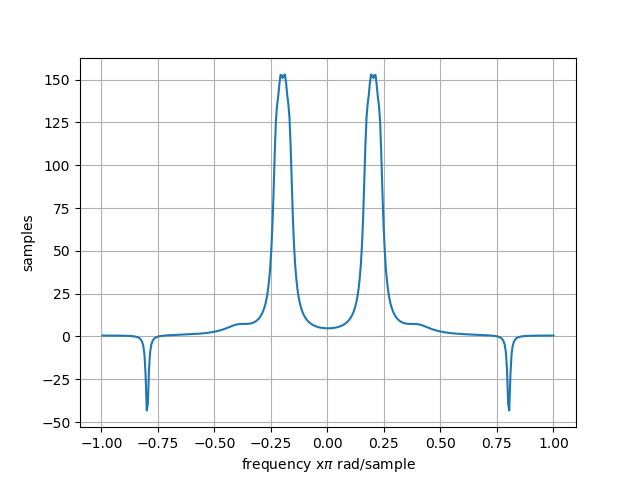

In [34]:
# calculate the group delay of the system:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

Now, we will appy the input signal to the system in the frequency domain by multiplying the Fourier transforms of both the signal and the system impulse response. After that, we will take the inverse Fourier transform of the output signal and compare it with the input signal. Our aim is to confirm the effect of the group delay by simulation.

**Please note** how we perform the inverse fft by first calculating **inverse fftshift** and then **ifft**.

<IPython.core.display.Javascript object>


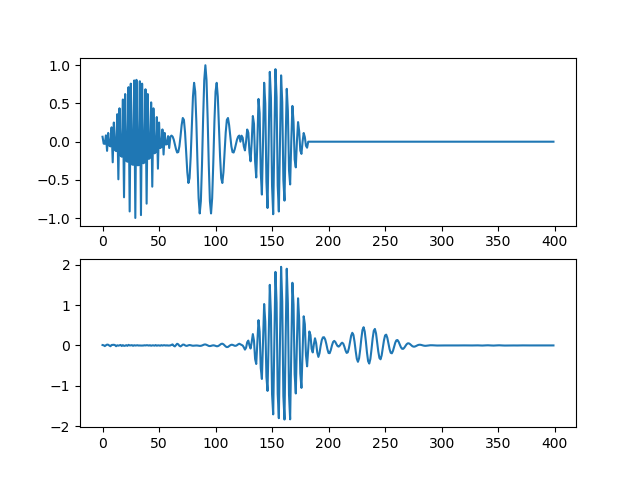

In [32]:
Yw_shifted = Hw * Xw_shifted          # we multiply the frequency response of the system with the **shifted** Fourier transform of the signal
Yw = np.fft.ifftshift(Yw_shifted)     # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw))                # we calculate the inverse fft and take the real component (because of numerical consistency)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(xn)
ax2.plot(yn)

Now we by looking at the input signal, frequency response of the system, and the output signal, we can analyze the the effect of the group delay on the signal. As can be seen in the last figure, components with different frequencies shifted different amounts of samples. The component with the lowest frequency ($0.2\pi$ rad/samples) shifted 150 samples. The component with $0.4\pi$ rad/samples shifted approx. 4 samples. Since the system suppressed the component with the highes frequency, it is not our concern anymore.

The obtained result, however, is problematic in most real-world (especially in real-time) applications. Because of the system, the signal is found to be distorted at the output. Consider the following analogy: you are playing a specific music part. You are playing several tones (input signal), however your instrument (i.e. the system) does not play the tunes in the correct order for some reason. Thus, it produces some nonsensical signal, which would be humiliating in front of an audience.